In [1]:
import pandas as pd
import math
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

In [2]:
#filePath = 'data/arc2yeardata.xlsx'
filePath = '/Volumes/OM/ECO/M&V/SWARM/Data/Barn Electricity 060618.csv'
#data = pd.read_excel(filePath, header=0, index_col=0, parse_dates=True)
data = pd.read_csv(filePath, header=0, index_col=0, parse_dates=True)
print(data.columns)

Index([u'The_Barn/Electricity_Demand'], dtype='object')


In [3]:
%load_ext autoreload
%autoreload 2

import sys
toolPath = r'/Users/decolvin/Box Sync/UCD_ECO_coding/mypy'
sys.path.append(toolPath)

import mnv
import matplotlib.pyplot as plt
print("Success!")

Success!


/Users/decolvin/anaconda/envs/MnV_Stuff/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
data.head()

,The_Barn/Electricity_Demand
DateTime,
2017-09-19 09:00:00,11.616409
2017-09-19 10:00:00,11.616409
2017-09-19 11:00:00,11.616409
2017-09-19 12:00:00,15.802648
2017-09-19 13:00:00,18.777026


Q(75%): 11.14 Q(25%): 6.12
IQR value is 5.02
Ceiling adjusted by IQR - Now 36.25
0


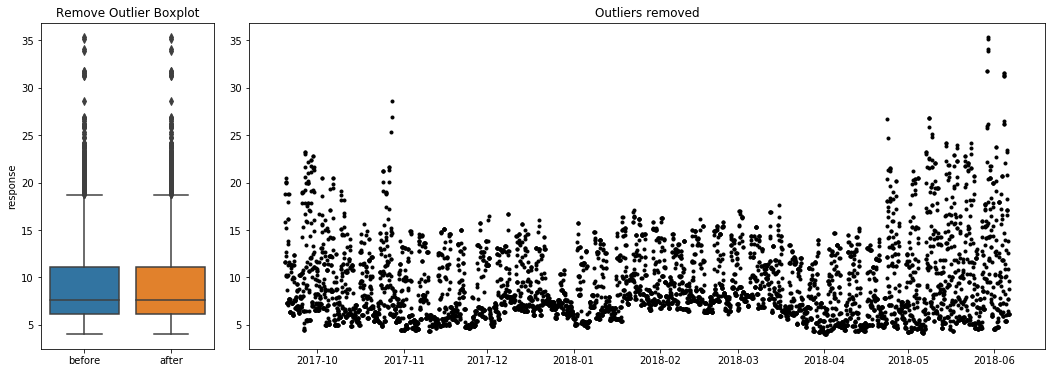

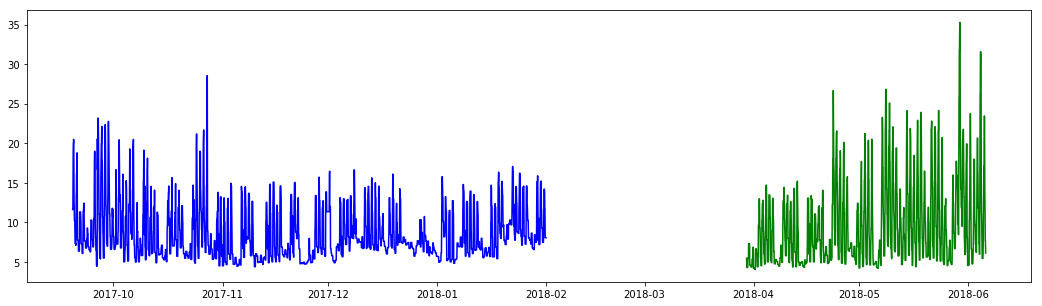

In [7]:
inputDict = {'IQRmult' : 5.0,
                 'IQR' : 'y',
                 'ceiling' : 1000000,
                 'floor' : 0,
                 'resampleRate' : 'H',
                 'verbosity' : 3,
                 'sliceType' : 'ranges', #half, middate, ranges
                 'midDate' : '2018-01-01', #only needed with sliceType : 'middate'
                 'dateRanges' : ['2017-09-01','2018-02-01','2018-03-30','2018-06-06'], #only needed with sliceType : 'ranges'
                 'OATname' : None,
                 'OATsource' : 'file'} #only needed with sliceType : 'ranges'}

data.rename(columns={data.columns[0]:"response"},inplace=True)
dc = mnv.data_handler(data["response"], inputDict)
dc.default_clean()

# Run this incase the y-range is FUBAR
#dc.outlier_plot(dc.modifiedData[dc.com]) 

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)
ax.plot(dc.pre[dc.com],color='b')
ax.plot(dc.post[dc.com],color='g')
plt.show()

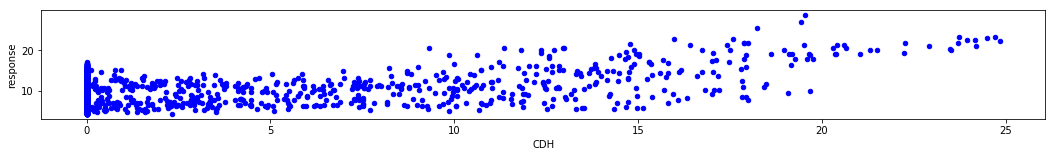

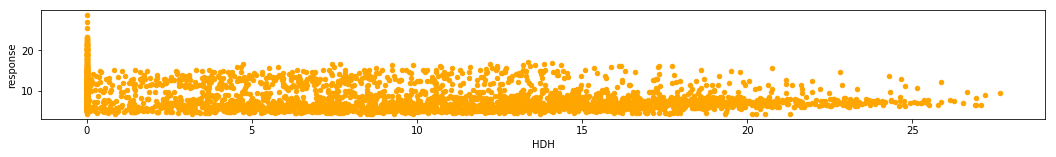

Response vs CDH = 0.50
Response vs HDH = -0.28
Response vs CDH2 = 0.52
Response vs HDH2 = -0.21


In [8]:
### Correlation
dc.pre.plot.scatter(x='CDH', y='response',figsize=(18,2), color='blue')
dc.pre.plot.scatter(x='HDH', y='response',figsize=(18,2), color='orange')
plt.show()
print "Response vs CDH = %.2f" %dc.pre.response.corr(dc.pre.CDH)
print "Response vs HDH = %.2f" %dc.pre.response.corr(dc.pre.HDH)
print "Response vs CDH2 = %.2f" %dc.pre.response.corr(dc.pre.CDH2)
print "Response vs HDH2 = %.2f" %dc.pre.response.corr(dc.pre.HDH2)

In [9]:
dc.pre.columns

Index([u'response', u'HDH', u'CDH', u'HDH2', u'CDH2', u'year', u'month', u'day', u'hour', u'minute', u'weekday', u'daytime', u'weekend', u'saturday', u'sunday'], dtype='object')

        AIC       AR2      BIC        R2      mse                                           params                                                sum
9   9536.14  0.647657  9689.36  0.651912  4.83965  CDH2 + HDH2 + C(hour) + C(weekend) + C(daytime)                              OLS Regression Res...
15  9536.14  0.647657  9689.36  0.651912  4.83965               CDH2 + HDH2 + C(hour) + C(weekend)                              OLS Regression Res...
1   9546.43  0.645968  9699.66  0.650243  4.86284                CDH2 + HDH + C(hour) + C(weekend)                              OLS Regression Res...


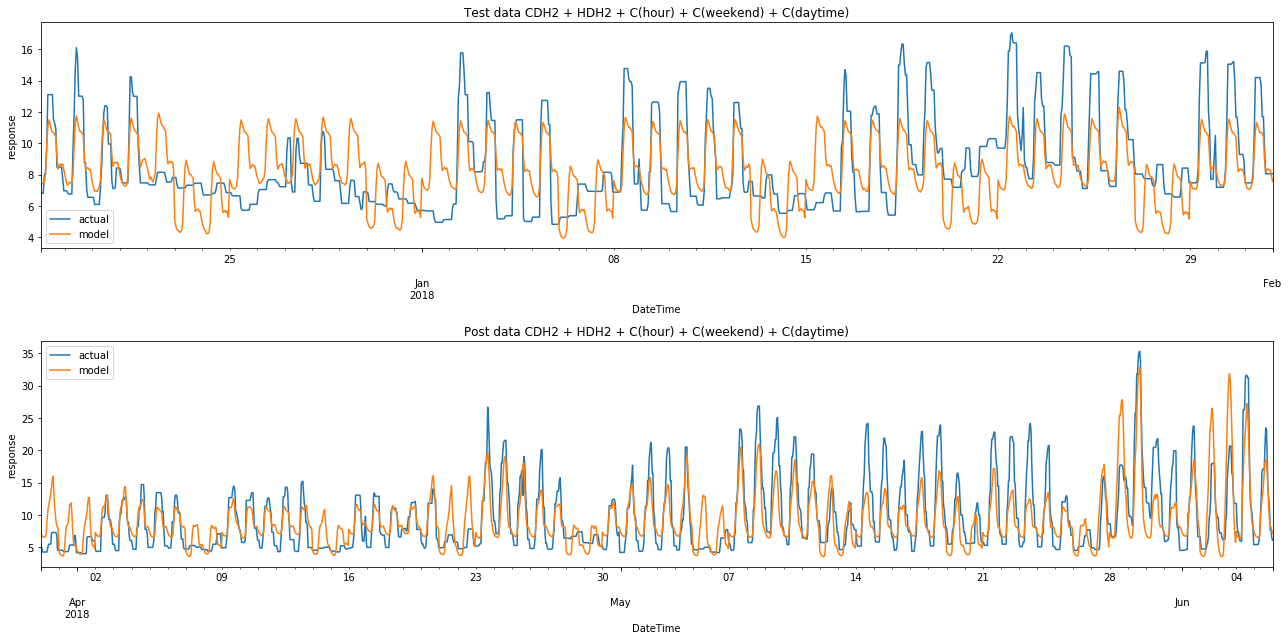

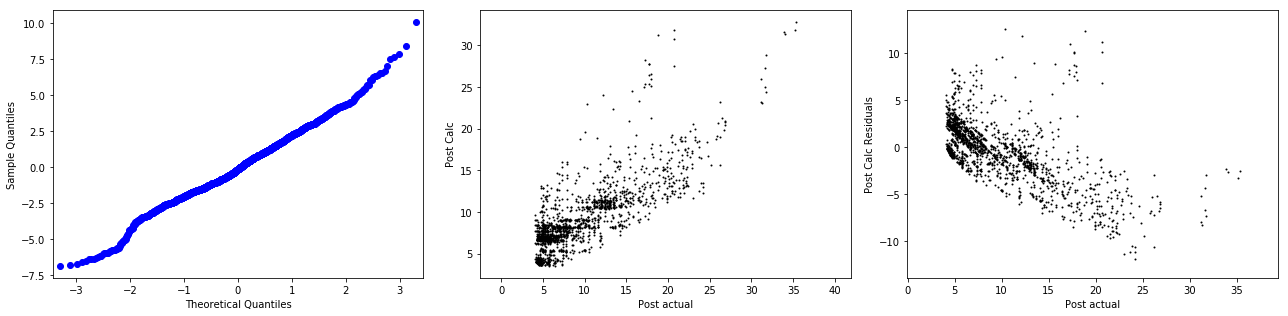


Best Paramaters = CDH2 + HDH2 + C(hour) + C(weekend) + C(daytime)


In [13]:
allmod = mnv.many_ols(dc.pre, dc.post, inputParams=['', 'C(hour)','C(weekend)', 'C(daytime)'])

allmod.run_all_linear()
print(allmod.statsPool[0:3])
allmod.plot_pool(1)

topParams = allmod.statsPool.iloc[0]['params']
print
print "Best Paramaters = %s" %topParams

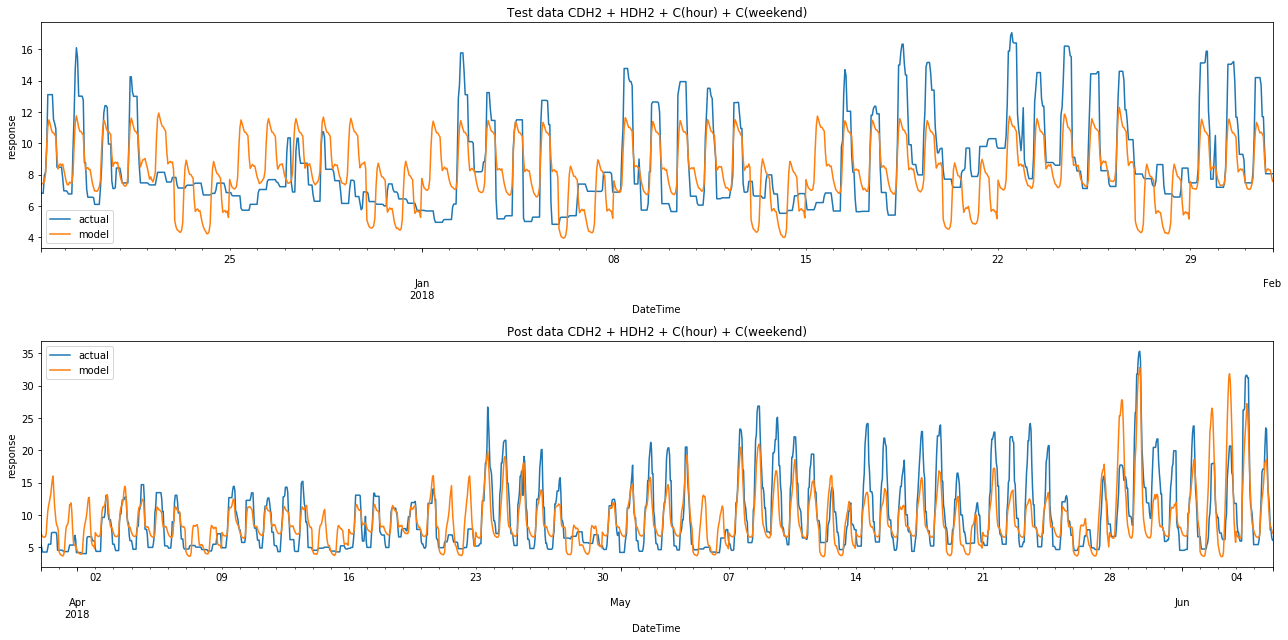

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     153.2
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:05:08   Log-Likelihood:                -4741.1
No. Observations:                2154   AIC:                             9536.
Df Residuals:                    2127   BIC:                             9689.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.1848      0.239     30.061      0.000       6.716       7.654
C(hour)[T.1]       -0.2993      0.328     -0.913      0.362      -0.943       0.344
C(hour)[T.2]       -0.5572      0.328     -1.698      0.090      -1.201       0.086
C(hour)[T.3]       -0.6382      0.329     -1.939      0.053      -1.284       0.007
C(hour)[T.4]       -0.7492      0.330     -2.273      0.023      -1.396      -0.103
C(hour)[T.5]       -0.7903      0.330     -2.395      0.017      -1.438      -0.143
C(hour)[T.6]       -0.7109      0.331     -2.151      0.032      -1.359      -0.063
C(hour)[T.7]       -0.2505      0.331     -0.758      0.449      -0.899       0.398
C(hour)[T.8]        1.7403      0.329      5.286      0.000       1.095       2.386
C(hour)[T.9]        3.3402      0.328     10.178      0.000       2.697       3.984
C(hour)[T.10]       4.0285      0.329     12.233      0.000       3.383       4.674
C(hour)[T.11]       3.9092      0.331     11.823      0.000       3.261       4.558
C(hour)[T.12]       3.6669      0.332     11.032      0.000       3.015       4.319
C(hour)[T.13]       3.4751      0.335     10.386      0.000       2.819       4.131
C(hour)[T.14]       3.4720      0.337     10.300      0.000       2.811       4.133
C(hour)[T.15]       3.3385      0.339      9.850      0.000       2.674       4.003
C(hour)[T.16]       3.2079      0.339      9.475      0.000       2.544       3.872
C(hour)[T.17]       1.8032      0.336      5.372      0.000       1.145       2.462
C(hour)[T.18]       0.9435      0.332      2.845      0.004       0.293       1.594
C(hour)[T.19]       0.9964      0.329      3.024      0.003       0.350       1.643
C(hour)[T.20]       1.0219      0.329      3.109      0.002       0.377       1.667
C(hour)[T.21]       0.8835      0.328      2.691      0.007       0.240       1.527
C(hour)[T.22]       0.8842      0.328      2.695      0.007       0.241       1.528
C(hour)[T.23]       0.4398      0.328      1.341      0.180      -0.203       1.083
C(weekend)[T.1]    -2.8371      0.105    -27.134      0.000      -3.042      -2.632
CDH2                0.0212      0.001     32.083      0.000       0.020       0.022
HDH2                0.0021      0.000      4.923      0.000       0.001       0.003
==============================================================================
Omnibus:                       22.724   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.341
Skew:                           0.137   Prob(JB):                     2.58e-07
Kurtosis:                       3.513   Cond. No.                     3.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [11]:
params = topParams
mod = mnv.ols_model(dc.pre, dc.post, params)
mod.model_plot()
plt.show()
mod.Fit.summary()

/Users/decolvin/anaconda/envs/MnV_Stuff/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


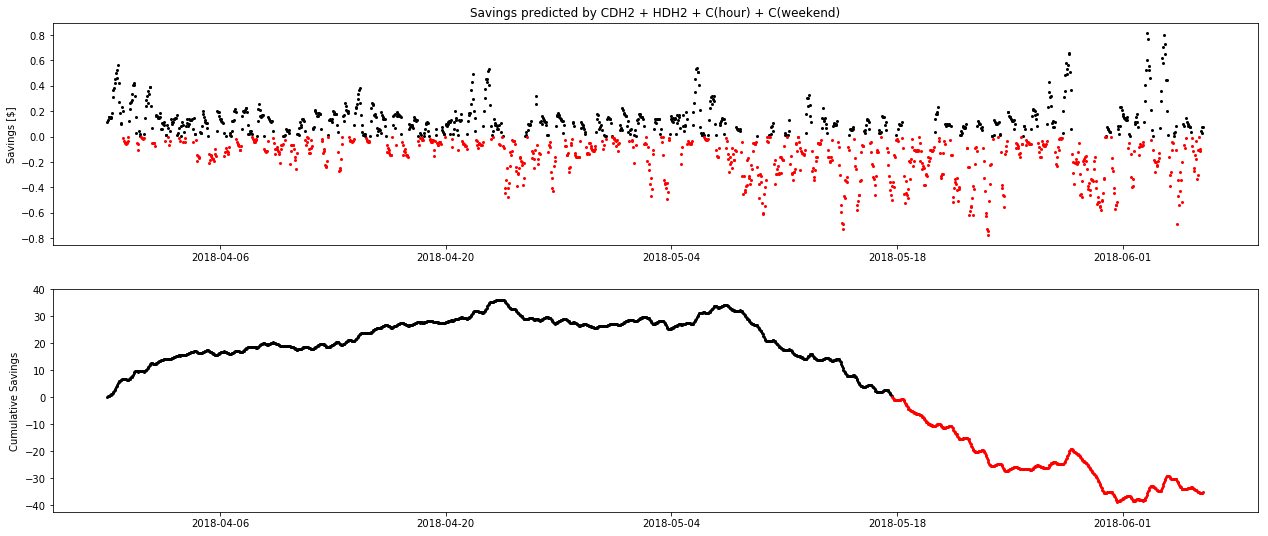

Total Savings over Post Period = $-35
R-Squared = 0.65
CVRMSE = 0.26


In [12]:
rates = {'chw':0.047, 'steam':6, 'elec':0.065} #tonh,klb,and kWh prices for 2017
commodity = 'elec'

mod.savings_plot(yaxis='dollars', rate=rates[commodity])
print "Total Savings over Post Period = $%.0f" %(mod.postCumsum * rates[commodity])
print "R-Squared = %.2f" %mod.Fit.rsquared_adj
print "CVRMSE = %.2f" %(math.sqrt(mod.Fit.mse_resid) / dc.pre.iloc[:,0].mean())